Try your best to segment an object of interest from the below images using any segmentation  
<table><tr>
    <td> <img src="fish.jpg"/> </td>
    <td> <img src="football.jpg"/> </td>
    <td> <img src="smartphone.jpg"/> </td>
    <td> <img src="pom.jpg"/> </td>
</tr></table>

method:  
o Thresholding  
• Grey  
• Color  
o Edge  
• 1st derivative  
• 2nd derivative  
• Canny

In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Football

(<matplotlib.image.AxesImage at 0x131430190>, Text(0.5, 1.0, 'Ball Original'))

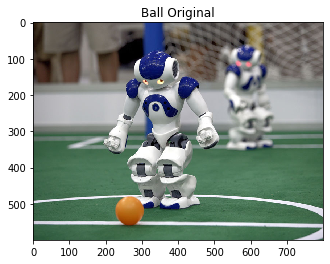

In [66]:
src_ball = cv2.imread('./football.jpg')
plt.imshow(cv2.cvtColor(src_ball, cv2.COLOR_BGR2RGB)), plt.title('Ball Original')

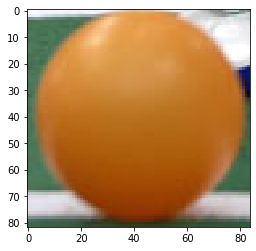

In [67]:
plt.imshow(cv2.cvtColor(src_ball[480:562, 224:308], cv2.COLOR_BGR2RGB))

In [68]:
src_hsv = cv2.cvtColor(src_ball, cv2.COLOR_BGR2HSV)
src_h = src_hsv[...,0]
src_s = src_hsv[...,1]
src_v = src_hsv[...,2]

Text(0.5, 1.0, 'V')

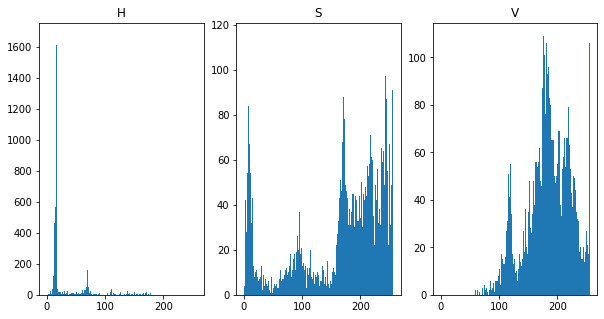

In [69]:
fig = plt.figure(figsize = (10,5))

plt.subplot(1,3,1), plt.hist(src_h[480:562, 224:308].ravel(),256,[0,256])
plt.title('H')

# check SAT ball
plt.subplot(1,3,2)
plt.hist(src_s[478:560,225:305].ravel(),256,[0,256])
plt.title('S')

# Check V ball
plt.subplot(1,3,3)
plt.hist(src_v[478:560,225:305].ravel(),256,[0,256])
plt.title('V')


In [91]:
mask_h = cv2.inRange(src_h, 10,18)

min_sat = 0.60
ret,mask_s = cv2.threshold(src_s, min_sat*255, 255, cv2.THRESH_BINARY)

min_v = 0.50
ret, mask_v = cv2.threshold(src_v, min_v*255, 255, cv2.THRESH_BINARY)

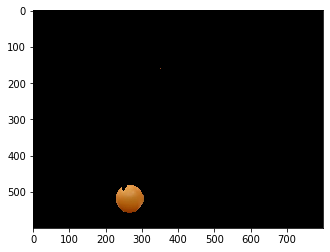

In [92]:
mask_hs = cv2.bitwise_and(mask_h, mask_s)

mask_hsv = cv2.bitwise_and(mask_hs, mask_v)

src_segment = cv2.bitwise_and(src_ball, cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2BGR))
plt.imshow(cv2.cvtColor(src_segment, cv2.COLOR_BGR2RGB))

# Pom

(<matplotlib.image.AxesImage at 0x12eed2450>, Text(0.5, 1.0, 'Pom'))

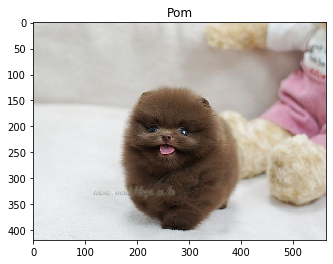

In [94]:
src_bgr = cv2.imread('pom.jpg')
src_hsv =  cv2.cvtColor(src_bgr, cv2.COLOR_BGR2HSV)
# Split the HSV image into three 1-channel greyscale images
src_h = src_hsv[:,:,0]
src_s = src_hsv[:,:,1]
src_v = src_hsv[:,:,2]
plt.imshow(cv2.cvtColor(src_bgr, cv2.COLOR_BGR2RGB)), plt.title('Pom')

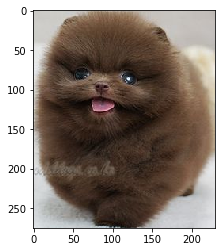

In [95]:
plt.imshow(cv2.cvtColor(src_bgr[125:400,170:400], cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'V')

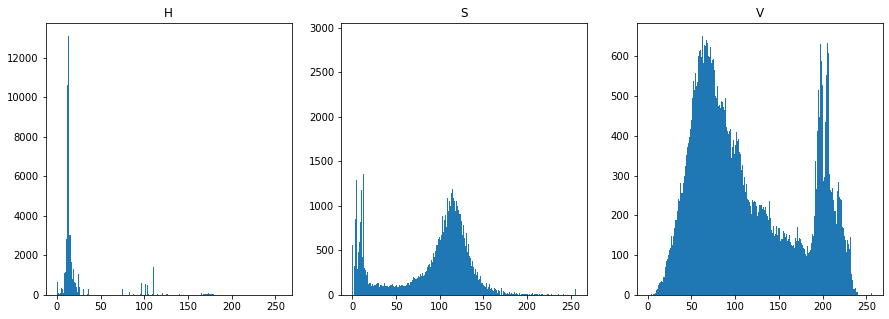

In [99]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1), plt.hist(src_h[125:400,170:400].ravel(),256, [0,256])
plt.title('H')
plt.subplot(1,3,2), plt.hist(src_s[125:400,170:400].ravel(),256, [0,256])
plt.title('S')
plt.subplot(1,3,3), plt.hist(src_v[125:400,170:400].ravel(),256, [0,256])
plt.title('V')

In [169]:
mask_h = cv2.inRange(src_h, 0,30)

min_sat = 0.10
ret,mask_s = cv2.threshold(src_s, min_sat*255, 255, cv2.THRESH_BINARY)

# min_v = 0.15
# ret, mask_v = cv2.threshold(src_v, min_v*255, 255, cv2.THRESH_BINARY)
mask_v = cv2.inRange(src_v, 0,100)

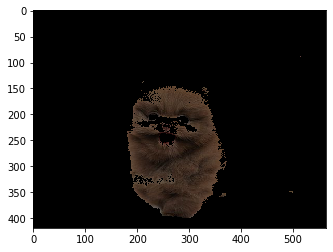

In [170]:
mask_hs = cv2.bitwise_and(mask_h, mask_s)

mask_hsv = cv2.bitwise_and(mask_hs, mask_v)

src_segment = cv2.bitwise_and(src_bgr, cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2BGR))
plt.imshow(cv2.cvtColor(src_segment, cv2.COLOR_BGR2RGB))

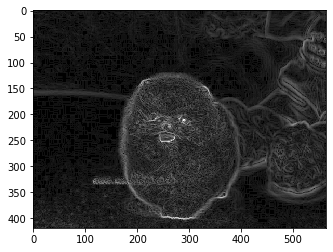

In [173]:
# Sobel (1st derivertive)
pom_gray = cv2.imread('./pom.jpg', cv2.IMREAD_GRAYSCALE)

gx = cv2.Sobel(pom_gray, cv2.CV_64F, 1,0, ksize=-1)
gy = cv2.Sobel(pom_gray, cv2.CV_64F, 0,1, ksize=-1)
mag= cv2.magnitude(gx, gy)
orient = cv2.phase(gx, gy)

def convert_normalize_8u(img):
    img_abs = np.absolute(img)
    img_8u = np.sqrt(img_abs*(255/img_abs.max()))
    return img_8u

#normalize
sobelX_8u = convert_normalize_8u(gx)
sobelY_8u = convert_normalize_8u(gy)
mag_8u = convert_normalize_8u(mag)

plt.imshow(mag_8u, cmap='gray')

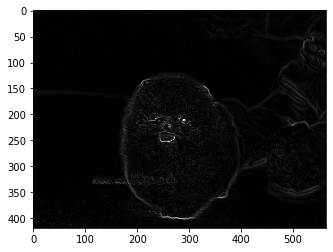

In [174]:
# Sobel
pom_grey = cv2.imread('pom.jpg', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel (pom_grey, cv2.CV_64F, 1, 0, ksize=-1)
sobel_y = cv2.Sobel (pom_grey, cv2.CV_64F, 0, 1, ksize=-1)
mag = cv2.magnitude(sobel_x , sobel_y)
orient = cv2.phase(sobel_x, sobel_y)

# Normalize function
def convert_normalize_8u ( img ):
    img_abs = np.absolute ( img )
    img_8u = np.uint8 ( img_abs * ( 255 / img_abs.max() ) )
    return img_8u


# normalize data
sobelX_8u = convert_normalize_8u (sobel_x)
sobelY_8u = convert_normalize_8u (sobel_y)
mag_8u = convert_normalize_8u(mag)

plt.imshow(mag_8u, cmap='gray')
